04/14/20

In [1]:
import MDAnalysis as mda
import time
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TPR = "md-res.tpr"
XTC = "md-res.xtc"

u = mda.Universe(TPR, XTC)

In [7]:
print(u.atoms[506:581]) #CY5

<AtomGroup [<Atom 507: O5' of type ON2 of resname CY5, resid 16 and segid seg_0_DNA_chain_A>, <Atom 508: O1P of type ON3 of resname CY5, resid 16 and segid seg_0_DNA_chain_A>, <Atom 509: P of type P2 of resname CY5, resid 16 and segid seg_0_DNA_chain_A>, ..., <Atom 579: CX5 of type CG2DC2 of resname CY5, resid 16 and segid seg_0_DNA_chain_A>, <Atom 580: HX5 of type HGA4 of resname CY5, resid 16 and segid seg_0_DNA_chain_A>, <Atom 581: O5' of type ON2 of resname DT, resid 17 and segid seg_0_DNA_chain_A>]>


In [14]:
print(u.atoms[1562:1594]) #DA_16

<AtomGroup [<Atom 1563: P of type P2 of resname DA, resid 48 and segid seg_1_DNA_chain_B>, <Atom 1564: O1P of type ON3 of resname DA, resid 48 and segid seg_1_DNA_chain_B>, <Atom 1565: O2P of type ON3 of resname DA, resid 48 and segid seg_1_DNA_chain_B>, ..., <Atom 1592: C3' of type CN7 of resname DA, resid 48 and segid seg_1_DNA_chain_B>, <Atom 1593: H3' of type HN7 of resname DA, resid 48 and segid seg_1_DNA_chain_B>, <Atom 1594: O3' of type ON2 of resname DA, resid 48 and segid seg_1_DNA_chain_B>]>


In [22]:
print(u.atoms[1594:1626]) # DA_17

<AtomGroup [<Atom 1595: P of type P2 of resname DA, resid 49 and segid seg_1_DNA_chain_B>, <Atom 1596: O1P of type ON3 of resname DA, resid 49 and segid seg_1_DNA_chain_B>, <Atom 1597: O2P of type ON3 of resname DA, resid 49 and segid seg_1_DNA_chain_B>, ..., <Atom 1624: C3' of type CN7 of resname DA, resid 49 and segid seg_1_DNA_chain_B>, <Atom 1625: H3' of type HN7 of resname DA, resid 49 and segid seg_1_DNA_chain_B>, <Atom 1626: O3' of type ON2 of resname DA, resid 49 and segid seg_1_DNA_chain_B>]>


In [23]:
def calc(u):
    """Calculate the angle for"""
    C = u.select_atoms("resid 48").center_of_geometry() #DA_15
    B = u.select_atoms("resid 49").center_of_geometry() #DA_16
    A = u.select_atoms("resname CY5").center_of_geometry()   #CY5
    BA = A - B # distance of CY5 to DA_16
    BC = C - B # distance of DA_15 to DA_16
    theta = np.rad2deg(np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC))))
    r=norm(BA)
    return r, theta;

In [24]:
time=[]
distance=[]
angle=[]
for ts in u.trajectory:
    result=calc(u)
    time.append(u.trajectory.time)
    distance.append(result[0])
    angle.append(result[1])

In [28]:
angle_distance=np.column_stack((angle,distance))

duration_second=(time[-1])*(1e-12) # seconds
duration_micro=duration_second*(1e6)
duration_nano=duration_second*(1e9)
print(str(duration_nano)+' nanoseconds')

50.0 nanoseconds


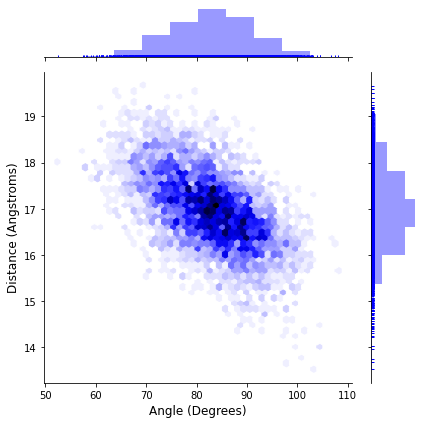

In [29]:
# Plot

h=sns.jointplot(x=angle,y=distance,kind='hex', color="b", marginal_kws=dict(bins=10,rug=True) )
h.set_axis_labels('Angle (Degrees)','Distance (Angstroms)',fontsize=12)

plt.tight_layout()
plt.savefig('unaccomodated.png')